<a href="https://colab.research.google.com/github/soorajabraham1/my_projects/blob/main/nerf_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation (only required for the first run)

In [1]:
!git clone --recursive https://github.com/kwea123/nerf_pl

%cd /content/nerf_pl
!pip install -r requirements.txt

%cd /content/nerf_pl/torchsearchsorted
!pip install .

fatal: destination path 'nerf_pl' already exists and is not an empty directory.
/content/nerf_pl
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
/content/nerf_pl/torchsearchsorted
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/nerf_pl/torchsearchsorted
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for torchsearchsorted: filename=torchsearchsorted-1.1-cp37-cp37m-linux_x86_64.whl size=3203740 sha256=d852af96bb57f9cf7c297e290b16993c923ca07a085f3eb27a8472ecc4586c45
  Stored in directory: /tmp/pip-ephem-wheel-c

# Mount your google drive (to access data)

In [2]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

Mounted at /content/drive/


# Train! (depending on number of epochs, takes about 5~8 hours)

### model weights are saved to `ckpts/$EXP`
### training logs (loss/PSNR evolution) are saved to `logs/$EXP`

## Forward facing scene

In [ ]:
%cd /content/nerf_pl

import os
# set training configurations here
os.environ['ROOT_DIR'] = "/content/drive/My Drive/colab/nerf/nerf_llff_data/fern"
                         # directory containing the data
os.environ['IMG_W'] = "504" # image width (do not set too large)
os.environ['IMG_H'] = "378" # image height (do not set too large)
os.environ['NUM_EPOCHS'] = "30" # number of epochs to train (depending on how many images there are,
                                # 20~30 might be enough)
os.environ['EXP'] = "JBL" # name of the experience (arbitrary)

!python train.py \
   --dataset_name llff \
   --root_dir "$ROOT_DIR" \
   --N_importance 64 --img_wh $IMG_W $IMG_H \
   --num_epochs $NUM_EPOCHS --batch_size 1024 \
   --optimizer adam --lr 5e-4 \
   --lr_scheduler cosine \
   --exp_name $EXP

/content/nerf_pl
INFO:lightning:GPU available: True, used: True
INFO:lightning:VISIBLE GPUS: 0
val image is /content/drive/My Drive/colab/nerf/nerf_llff_data/fern/images/IMG_4038.JPG
2020-04-26 09:16:47.901672: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
0it [00:00, ?it/s]/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/warnings.py:18: RuntimeWarning: Displayed epoch numbers in the progress bar start from "1" until v0.6.x, but will start from "0" in v0.8.0.
  warnings.warn(*args, **kwargs)
Epoch 1: 100% 3535/3536 [11:00<00:00,  5.35it/s, loss=0.014, train_psnr=22.2, v_num=0]
Validating:   0% 0/1 [00:00<?, ?it/s]
Epoch 1: 100% 3536/3536 [11:11<00:00,  5.27it/s, loss=0.014, train_psnr=22.2, v_num=0, val_loss=0.0149, val_psnr=21.3]
Epoch 2: 100% 3535/3536 [10:59<00:00,  5.36it/s, loss=0.012, train_psnr=22.5, v_num=0, val_loss=0.0149, val_psnr=21.3]
Validating:   0% 0/1 [00:00<?, ?it/s]
Epoch 2: 100

## 360 inward-facing scene

In [3]:
%cd /content/nerf_pl

import os
# set training configurations here
os.environ['ROOT_DIR'] = "/content/drive/My Drive/Nerf_Data"
                         # directory containing the data
os.environ['IMG_W'] = "464" # image width (do not set too large)
os.environ['IMG_H'] = "261" # image height (do not set too large)
os.environ['NUM_EPOCHS'] = "6" # number of epochs to train (depending on how many images there are,
                                # 20~30 might be enough)
os.environ['EXP'] = "exp" # name of the experience (arbitrary)

!python train.py \
   --dataset_name llff \
   --root_dir "$ROOT_DIR" \
   --N_importance 64 --img_wh $IMG_W $IMG_H \
   --spheric --use_disp \
   --num_epochs $NUM_EPOCHS --batch_size 1024 \
   --optimizer adam --lr 5e-4 \
   --lr_scheduler cosine \
   --exp_name $EXP

/content/nerf_pl
INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:lightning:GPU available: True, used: True
INFO:lightning:CUDA_VISIBLE_DEVICES: [0]
val image is /content/drive/My Drive/Nerf_Data/images/1.jpg
Epoch 1: 100% 4376/4377 [20:49<00:00,  3.50it/s, loss=0.003, train_psnr=28.1, v_num=0]
Validating: 0it [00:00, ?it/s]
Epoch 1: 100% 4377/4377 [21:02<00:00,  3.47it/s, loss=0.003, train_psnr=28.1, v_num=0, val_loss=0.00412, val_psnr=27]
Epoch 2: 100% 4376/4377 [20:49<00:00,  3.50it/s, loss=0.003, train_psnr=26.3, v_num=0, val_loss=0.00412, val_psnr=27]
Validating: 0it [00:00, ?it/s]
Epoch 2: 100% 4377/4377 [21:02<00:00,  3.47it/s, loss=0.003, train_psnr=26.3, v_num=0, val_loss=0.0026, val_psnr=28.6]
Epoch 3: 100% 4376/4377 [20:41<00:00,  3.52it/s, loss=0.002, train_psnr=31.5, v_num=0, val_loss=0.0026, val_psnr=28.6]
Validating: 0it [00:00, ?it/s]
Epoch 3: 100% 4377/4377 [20:55<00:00,  3.49it/s, loss=0.002, train_psnr=31.5, v_num=0, val_loss=0.00187, val_psnr=30.5]
Epoch 4: 

# Testing! (takes about 20~30 minutes)

### You can also download the pretrained model for `fern` [here](https://github.com/kwea123/nerf_pl/releases)

### The results are saved to `results/llff/$SCENE`

In [5]:
os.environ['SCENE'] = 'exp'
os.environ['CKPT_PATH'] = '/content/nerf_pl/ckpts/exp/epoch=5.ckpt'

!python eval.py \
   --root_dir "$ROOT_DIR" \
   --dataset_name llff --scene_name $SCENE \
   --img_wh $IMG_W $IMG_H --N_importance 64 --ckpt_path $CKPT_PATH

100% 120/120 [25:24<00:00, 12.70s/it]


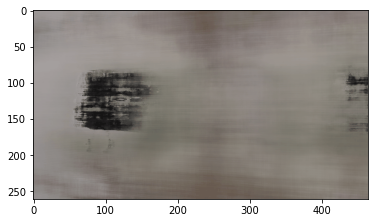

In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread("/content/nerf_pl/results/llff/exp/exp.gif")
plt.imshow(img)